# Part 1: Text Collection


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Extras/imdb_movies.csv')

In [ ]:
df.head()

# Part 2: Text Preprocessing


In [ ]:
import nltk

# nltk.download('movie_reviews')

nltk.download('gutenberg')
text = gutenberg.raw('shakespeare-hamlet.txt')

In [ ]:
from nltk.corpus import movie_reviews

# View categories (positive/negative)
print(movie_reviews.categories())

In [ ]:
# corpus = movie_reviews.raw()

corpus = gutenberg.raw('shakespeare-hamlet.txt')

In [ ]:
print(corpus[:199])

## Tokenization


In [ ]:
import nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Word Tokenize
words = word_tokenize(corpus)

# Sentence Tokenize 
sentences = sent_tokenize(corpus)

In [ ]:
print(words[:10])

In [ ]:
print(sentences[:2])

## Stemming


In [ ]:
from nltk.stem import PorterStemmer

# Stemming: Reduce words to their root form using Porter Stemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

In [ ]:
print(stemmed_words[:10])

## Lemmatization


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [ ]:
print(lemmatized_words[:10])

## Stop Words


In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]

In [ ]:
print(filtered_words[:10])

Each preprocessing step has its impact:

### Tokenization:

Splits the text into words and sentences. This step breaks down the text into its basic units, enabling further analysis at the word or sentence level.

### Stemming:

Reduces words to their root form. Stemming helps in reducing inflected words to their base or root form, which can help in normalization and reducing the vocabulary size.

### Lemmatization:

Further reduces stemmed words by considering their context. Lemmatization goes beyond stemming by considering the context of words and reducing them to their dictionary form or lemma, which can improve accuracy in some cases.

### Stop Word Removal:

Eliminates common words that may not be useful for analysis. Stop word removal helps in removing noise from the text and focusing on the most meaningful words for analysis.

Each preprocessing step plays a crucial role in preparing the text data for analysis, and the choice of which steps to include depends on the specific requirements of the NLP task at hand.


## Remove Punctuation


In [ ]:
# Remove Punctuation from words 
import string

punctuations = list(string.punctuation)
punvar = [word for word in filtered_words if word not in punctuations]

print(punvar[:20])

# Part 3: Feature Extraction


## One Hot Encoding

One hot encoding represents each word in the text as a binary vector where each element in the vector represents the presence or absence of the word in the text. This method is simple and straightforward but may result in high-dimensional sparse vectors


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Convert the list of words into a 2D array for OneHotEncoder
wordsforen = [[word] for word in punvar]

# One-hot encoding using scikit-learn
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoded_data = encoder.fit_transform(wordsforen[:5])

# Get feature names
feature_names = encoder.get_feature_names_out(['Item'])

# Create DataFrame with encoded data
df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

In [ ]:
print(df_encoded)

## Bag of Words

Bag-of-Words representation counts the frequency of each word in the text and constructs a feature vector where each element represents the count of a particular word. It ignores the order of words in the text


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data
bag_of_words_matrix = vectorizer.fit_transform(punvar[:5])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the bag-of-words matrix to a DataFrame
df_bag_of_words = pd.DataFrame(bag_of_words_matrix.toarray(), columns=feature_names)

## TF-IDF

TF-IDF calculates the importance of a word in a document relative to a collection of documents. It considers both the frequency of the word in the current document and the inverse frequency of the word across all documents


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences[:5])

# Convert TF-IDF matrix to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
# Print the DataFrame
print(df_tfidf)

## n-grams

n-grams represent contiguous sequences of n words from the text. They capture the local word order and can provide more context compared to single words.


In [ ]:
# Create a CountVectorizer instance for n-grams (here, n=2)
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the preprocessed text data
ngram_matrix = ngram_vectorizer.fit_transform(sentences[:5])

# Convert n-gram matrix to DataFrame
df_ngram = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())


In [ ]:
print(df_ngram)

## World Cloud Visualization


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming you have defined punvar, count_vectorizer, and tfidf_vectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit CountVectorizer and TfidfVectorizer to your data
X_train_counts = count_vectorizer.fit_transform(punvar)
X_train_tfidf = tfidf_vectorizer.fit_transform(punvar)

# Extract feature names (words) from CountVectorizer
feature_names_counts = count_vectorizer.get_feature_names_out()
# Extract feature names (words) from TfidfVectorizer
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary of word frequencies for CountVectorizer
word_freq_dict_counts = dict(zip(feature_names_counts, X_train_counts.sum(axis=0).A1))
# Create a dictionary of word frequencies for TfidfVectorizer
word_freq_dict_tfidf = dict(zip(feature_names_tfidf, X_train_tfidf.sum(axis=0).A1))

# Generate word cloud for CountVectorizer
wordcloud_counts = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict_counts)
# Generate word cloud for TfidfVectorizer
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict_tfidf)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_counts, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for CountVectorizer')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TfidfVectorizer')

plt.show()


# Part 4: Word Embeddings


In [35]:
import nltk
import string
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('gutenberg')
nltk.download('stopwords')

text = gutenberg.raw('shakespeare-hamlet.txt')
words = word_tokenize(text)

# Remove punctuation
punctuations = set(string.punctuation)
words = [word for word in words if word not in punctuations]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words_new = [word for word in words if word.lower() not in stop_words]

print(filtered_words_new)


[nltk_data] Downloading package gutenberg to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\laptop
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Tragedie', 'Hamlet', 'William', 'Shakespeare', '1599', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'Francisco', 'two', 'Centinels', 'Barnardo', "'s", 'Fran', 'Nay', 'answer', 'Stand', 'vnfold', 'selfe', 'Bar', 'Long', 'liue', 'King', 'Fran', 'Barnardo', 'Bar', 'Fran', 'come', 'carefully', 'vpon', 'houre', 'Bar', "'T", 'strook', 'twelue', 'get', 'thee', 'bed', 'Francisco', 'Fran', 'releefe', 'much', 'thankes', "'T", 'bitter', 'cold', 'sicke', 'heart', 'Barn', 'Haue', 'quiet', 'Guard', 'Fran', 'Mouse', 'stirring', 'Barn', 'Well', 'goodnight', 'meet', 'Horatio', 'Marcellus', 'Riuals', 'Watch', 'bid', 'make', 'hast', 'Enter', 'Horatio', 'Marcellus', 'Fran', 'thinke', 'heare', 'Stand', "'s", 'Hor', 'Friends', 'ground', 'Mar', 'Leige-men', 'Dane', 'Fran', 'Giue', 'good', 'night', 'Mar', 'farwel', 'honest', 'Soldier', 'hath', 'relieu', "'d", 'Fra', 'Barnardo', 'ha', "'s", 'place', 'giue', 'goodnight', 'Exit', 'Fran', 'Mar', 'Holla', 'Barnardo', 'Bar', 'Say', 'Horatio', 'Hor',

In [ ]:
import gensim.downloader as api
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load pre-trained embeddings
word2vec_model = api.load("word2vec-google-news-300")
glove_model = api.load("glove-wiki-gigaword-100")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")
    

In [ ]:
# Tokenize the text
tokenized_text = filtered_words_new

# Initialize lists to store embeddings
word2vec_embeddings = []
glove_embeddings = []
fasttext_embeddings = []

# Get embeddings for each word
for word in tokenized_text:
    try:
        word2vec_embeddings.append(word2vec_model[word])
    except KeyError:
        word2vec_embeddings.append(np.zeros(word2vec_model.vector_size))
    try:
        glove_embeddings.append(glove_model[word])
    except KeyError:
        glove_embeddings.append(np.zeros(glove_model.vector_size))
    try:
        fasttext_embeddings.append(fasttext_model[word])
    except KeyError:
        fasttext_embeddings.append(np.zeros(fasttext_model.vector_size))

# Convert lists to numpy arrays
word2vec_embeddings = np.array(word2vec_embeddings)
glove_embeddings = np.array(glove_embeddings)
fasttext_embeddings = np.array(fasttext_embeddings)

In [ ]:
print(word2vec_embeddings.shape)
print(glove_embeddings.shape)
print(fasttext_embeddings.shape)

In [ ]:
def visualize_embeddings(embeddings,tokenized_text, title):
    tsne = TSNE(n_components=2, perplexity=49, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, token in enumerate(tokenized_text):
        if(i < 18):
            plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title(title)
    plt.show()

In [ ]:
# Visualize Word2Vec embeddings
visualize_embeddings(word2vec_embeddings, tokenized_text[:50], "word2vec_model")

In [ ]:
# Visualize GloVe embeddings
visualize_embeddings(glove_embeddings, tokenized_text[:50], "glove_model")

In [ ]:
# Visualize FastText embeddings
visualize_embeddings(fasttext_embeddings, tokenized_text[:50], "fasttext_model")

# Part 5: Model Training and Evaluation


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Step 1: Data Preparation

# Assuming 100 samples, 20 time steps, and 5 features
num_samples = 100
sequence_length = 20
num_features = 5

# Placeholder data
X_train = np.random.randn(num_samples, sequence_length, num_features)
y_train = np.random.randint(2, size=num_samples)  # Binary classification labels

X_test = np.random.randn(num_samples // 2, sequence_length, num_features)
y_test = np.random.randint(2, size=num_samples // 2)  # Binary classification labels

In [2]:
# Step 2: Model Construction
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=64, input_shape=input_shape),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_gru_model(input_shape):
    model = Sequential([
        GRU(units=64, input_shape=input_shape),
        Dense(1, activation='sigmoid')
    ])
    return model

In [46]:
# Step 3: Model Training
# Define input shape based on your data
input_shape = (sequence_length, num_features)

# Build LSTM and GRU models
lstm_model = build_lstm_model(input_shape)
gru_model = build_gru_model(input_shape)

# Compile models
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train models
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

c:\Users\laptop zone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.5236 - loss: 0.6943 - val_accuracy: 0.5800 - val_loss: 0.6846
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6162 - loss: 0.6830 - val_accuracy: 0.4600 - val_loss: 0.6893
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.6086 - loss: 0.6773 - val_accuracy: 0.4400 - val_loss: 0.6910
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5466 - loss: 0.6759 - val_accuracy: 0.4600 - val_loss: 0.6927
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6395 - loss: 0.6652 - val_accuracy: 0.4800 - val_loss: 0.6965
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6157 - loss: 0.6583 - val_accuracy: 0.4800 - val_loss: 0.7032
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6602 - loss: 0.6454 - val_accuracy: 0.4800 - val_loss: 0.7148
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6083 - loss: 0.6462 - val_accuracy: 0.4800 - val_loss: 0.7

In [24]:
# Step 4: Performance Comparison
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4867 - loss: 0.7604
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4762 - loss: 0.7120 


In [26]:
print("LSTM Accuracy:", lstm_accuracy)
print("GRU Accuracy :", gru_accuracy)

LSTM Accuracy: 0.47999998927116394
GRU Accuracy : 0.47999998927116394


# Part 6: Part 6: Visualization and Interpretation

## Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


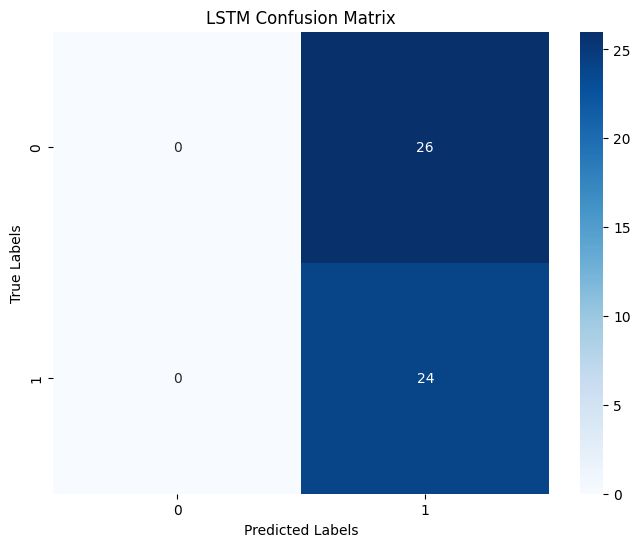

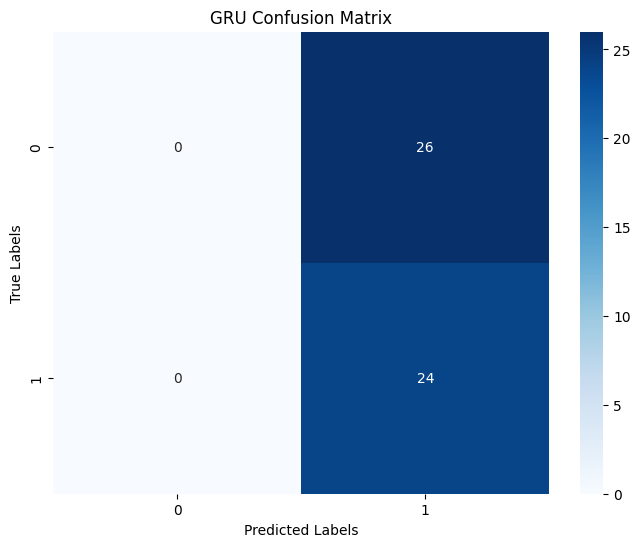

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get predictions from LSTM and GRU models
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

lstm_predictions_binary = (lstm_predictions > 0.5).astype(int)
gru_predictions_binary = (gru_predictions > 0.5).astype(int)

# Plot confusion matrices
plot_confusion_matrix(y_test, lstm_predictions_binary, title='LSTM Confusion Matrix')
plot_confusion_matrix(y_test, gru_predictions_binary, title='GRU Confusion Matrix')


## Visualize Predictions

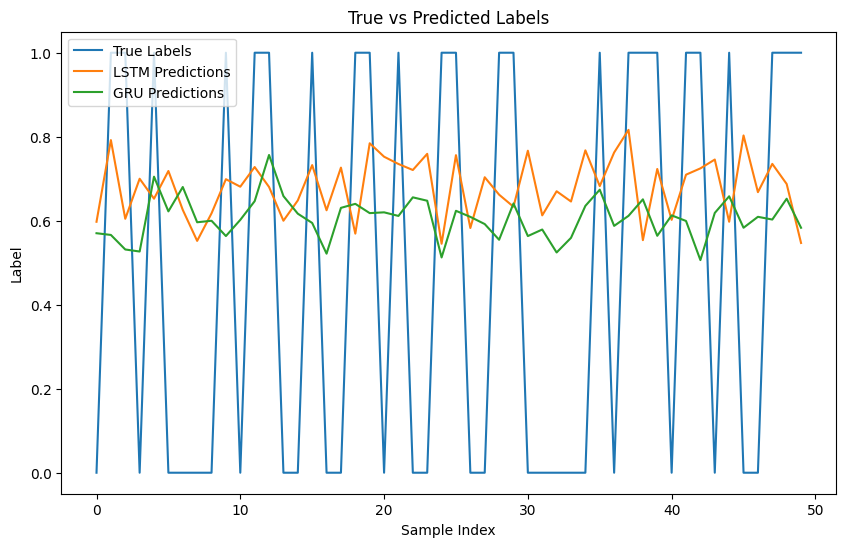

In [58]:
# Plot true labels vs predicted labels for a subset of data
subset_indices = np.random.choice(len(y_test), size=50, replace=False)
plt.figure(figsize=(10, 6))
plt.plot(y_test[subset_indices], label='True Labels')
plt.plot(lstm_predictions[subset_indices], label='LSTM Predictions')
plt.plot(gru_predictions[subset_indices], label='GRU Predictions')
plt.title('True vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


## Learning Curves

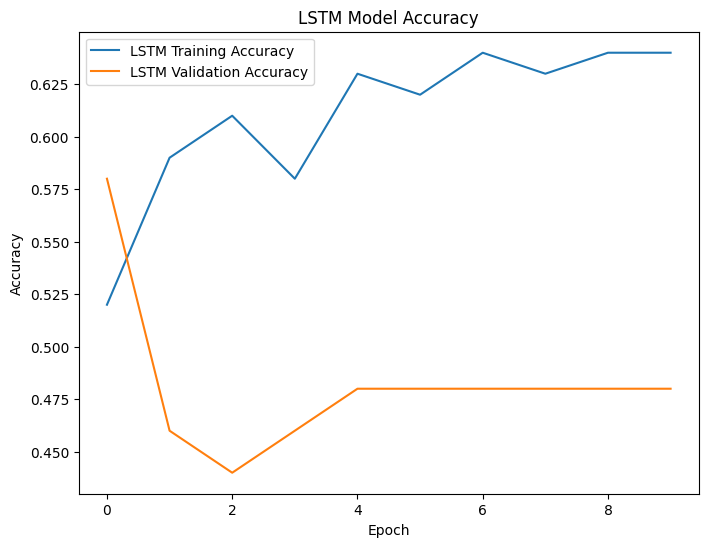

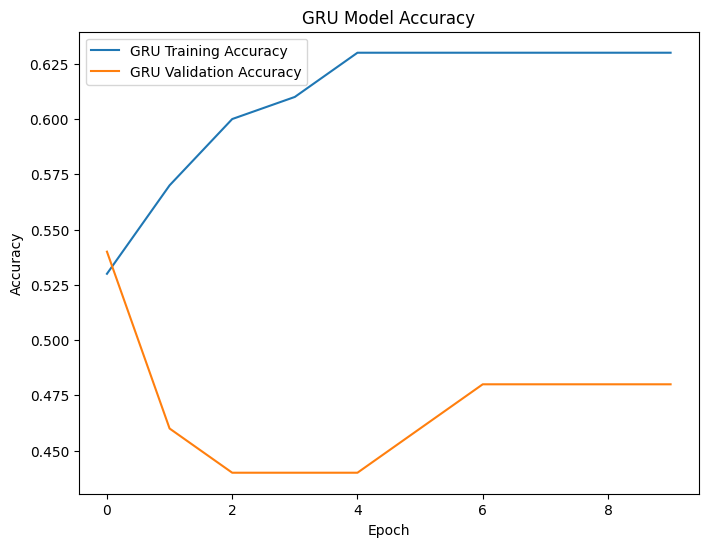

In [47]:
# Plot Learning Curves for LSTM Model
plt.figure(figsize=(8, 6))
plt.plot(lstm_model.history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')
plt.legend()
plt.show()

# Plot Learning Curves for GRU Model
plt.figure(figsize=(8, 6))
plt.plot(gru_model.history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_model.history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Model Accuracy')
plt.legend()
plt.show()


## Loss Curves

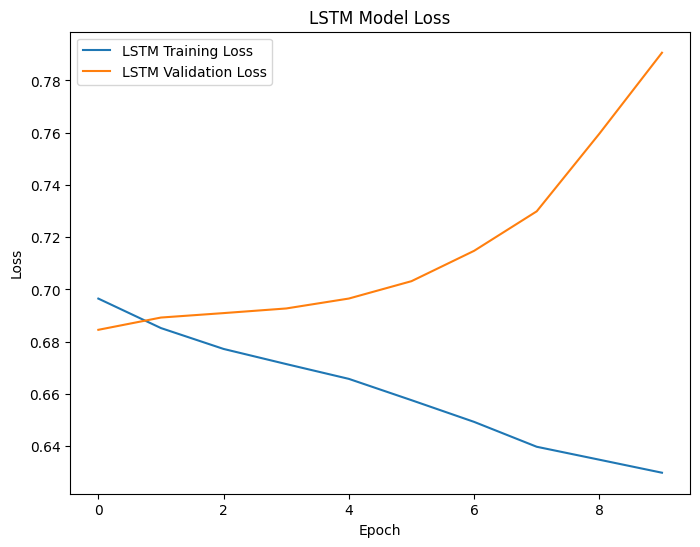

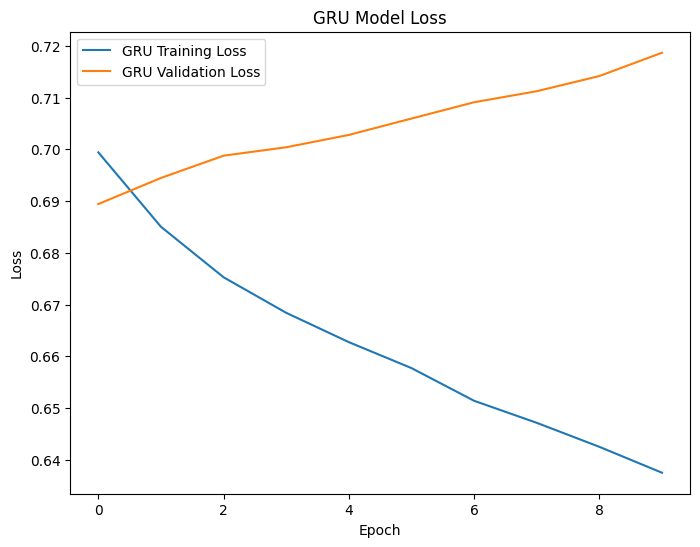

In [48]:
# Plot Loss Curves for LSTM Model
plt.figure(figsize=(8, 6))
plt.plot(lstm_model.history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_model.history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()

# Plot Loss Curves for GRU Model
plt.figure(figsize=(8, 6))
plt.plot(gru_model.history.history['loss'], label='GRU Training Loss')
plt.plot(gru_model.history.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Model Loss')
plt.legend()
plt.show()


## Precision Recall Curve

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000028CF23A76A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


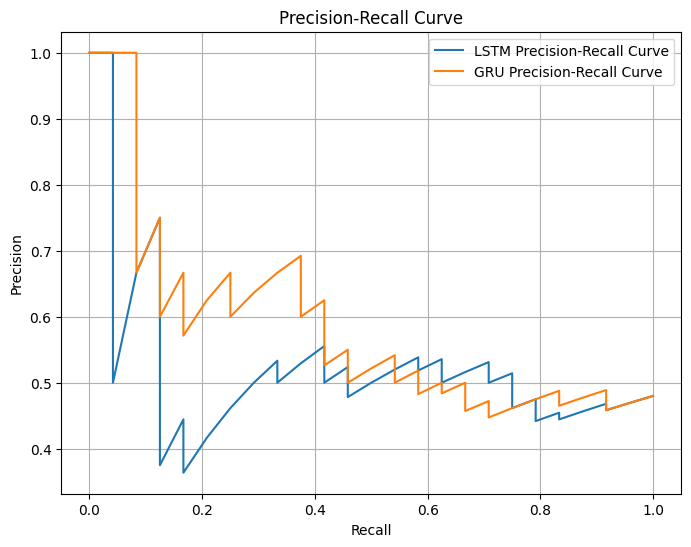

In [51]:
# Precision-Recall Curve for LSTM and GRU Models

from sklearn.metrics import precision_recall_curve

# Obtain probabilities from LSTM and GRU models
lstm_probabilities = lstm_model.predict(X_test)
gru_probabilities = gru_model.predict(X_test)

plt.figure(figsize=(8, 6))
lstm_precision, lstm_recall, _ = precision_recall_curve(y_test, lstm_probabilities)
plt.plot(lstm_recall, lstm_precision, label=f'LSTM Precision-Recall Curve')

gru_precision, gru_recall, _ = precision_recall_curve(y_test, gru_probabilities)
plt.plot(gru_recall, gru_precision, label=f'GRU Precision-Recall Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
